In [3]:
%matplotlib inline
import lsst.daf.persistence as dafPersist
import lsst.afw.table as afwTable
import lsst.afw.geom as afwGeom
import lsst.afw.coord as afwCoord
import lsst.afw.image as afwImage
import numpy as np
import matplotlib
import matplotlib.pylab as plt
from astropy.table import Table, vstack

visit = 11692
ccd = 35
filter = 'HSC-G'
tract = 0

fluxT = 'ext_photometryKron_KronFlux'
#fluxT = 'base_CircularApertureFlux_6_0'

dataid = {'visit':visit, 'filter':filter, 'ccd':ccd, 'tract':tract}

butler = dafPersist.Butler("/sps/lsst/users/lsstprod/hsc/SSP_UDEEP_COSMOS/output")
mdRef = butler.get("calexp_md", dataid, immediate=True)
calibOld = afwImage.Calib(mdRef)

photoCalib = butler.get('photoCalib', dataid, immediate=True)
calibNew = afwImage.Calib(photoCalib.getInstFluxMag0())

src = butler.get('src', dataid, immediate=True).asAstropy()

In [2]:
src

id,coord_ra,coord_dec,parent,calib_detected,calib_psfCandidate,calib_psfUsed,calib_psfReserved,deblend_nChild,deblend_deblendedAsPsf,deblend_psfCenter_x,deblend_psfCenter_y,deblend_psfFlux,deblend_tooManyPeaks,deblend_parentTooBig,deblend_masked,deblend_skipped,deblend_rampedTemplate,deblend_patchedTemplate,deblend_hasStrayFlux,base_GaussianCentroid_x,base_GaussianCentroid_y,base_GaussianCentroid_flag,base_GaussianCentroid_flag_noPeak,base_GaussianCentroid_flag_resetToPeak,base_NaiveCentroid_x,base_NaiveCentroid_y,base_NaiveCentroid_flag,base_NaiveCentroid_flag_noCounts,base_NaiveCentroid_flag_edge,base_NaiveCentroid_flag_resetToPeak,base_SdssCentroid_x,slot_Centroid_x,base_SdssCentroid_y,slot_Centroid_y,base_SdssCentroid_xSigma,slot_Centroid_xSigma,base_SdssCentroid_ySigma,slot_Centroid_ySigma,base_SdssCentroid_flag,base_CircularApertureFlux_flag_badCentroid,base_GaussianCentroid_flag_badInitialCentroid,base_GaussianFlux_flag_badCentroid,base_NaiveCentroid_flag_badInitialCentroid,base_PsfFlux_flag_badCentroid,base_SdssShape_flag_badCentroid,base_Variance_flag_badCentroid,ext_photometryKron_KronFlux_flag_badInitialCentroid,ext_shapeHSM_HsmPsfMoments_flag_badCentroid,ext_shapeHSM_HsmShapeRegauss_flag_badCentroid,ext_shapeHSM_HsmSourceMoments_flag_badCentroid,slot_Centroid_flag,base_SdssCentroid_flag_edge,base_CircularApertureFlux_flag_badCentroid_edge,base_GaussianCentroid_flag_badInitialCentroid_edge,base_GaussianFlux_flag_badCentroid_edge,base_NaiveCentroid_flag_badInitialCentroid_edge,base_PsfFlux_flag_badCentroid_edge,base_SdssShape_flag_badCentroid_edge,base_Variance_flag_badCentroid_edge,ext_photometryKron_KronFlux_flag_badInitialCentroid_edge,ext_shapeHSM_HsmPsfMoments_flag_badCentroid_edge,ext_shapeHSM_HsmShapeRegauss_flag_badCentroid_edge,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_edge,slot_Centroid_flag_edge,base_SdssCentroid_flag_noSecondDerivative,base_CircularApertureFlux_flag_badCentroid_noSecondDerivative,base_GaussianCentroid_flag_badInitialCentroid_noSecondDerivative,base_GaussianFlux_flag_badCentroid_noSecondDerivative,base_NaiveCentroid_flag_badInitialCentroid_noSecondDerivative,base_PsfFlux_flag_badCentroid_noSecondDerivative,base_SdssShape_flag_badCentroid_noSecondDerivative,base_Variance_flag_badCentroid_noSecondDerivative,ext_photometryKron_KronFlux_flag_badInitialCentroid_noSecondDerivative,ext_shapeHSM_HsmPsfMoments_flag_badCentroid_noSecondDerivative,ext_shapeHSM_HsmShapeRegauss_flag_badCentroid_noSecondDerivative,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_noSecondDerivative,slot_Centroid_flag_noSecondDerivative,base_SdssCentroid_flag_almostNoSecondDerivative,base_CircularApertureFlux_flag_badCentroid_almostNoSecondDerivative,base_GaussianCentroid_flag_badInitialCentroid_almostNoSecondDerivative,base_GaussianFlux_flag_badCentroid_almostNoSecondDerivative,base_NaiveCentroid_flag_badInitialCentroid_almostNoSecondDerivative,base_PsfFlux_flag_badCentroid_almostNoSecondDerivative,base_SdssShape_flag_badCentroid_almostNoSecondDerivative,base_Variance_flag_badCentroid_almostNoSecondDerivative,ext_photometryKron_KronFlux_flag_badInitialCentroid_almostNoSecondDerivative,ext_shapeHSM_HsmPsfMoments_flag_badCentroid_almostNoSecondDerivative,ext_shapeHSM_HsmShapeRegauss_flag_badCentroid_almostNoSecondDerivative,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_almostNoSecondDerivative,slot_Centroid_flag_almostNoSecondDerivative,base_SdssCentroid_flag_notAtMaximum,base_CircularApertureFlux_flag_badCentroid_notAtMaximum,base_GaussianCentroid_flag_badInitialCentroid_notAtMaximum,base_GaussianFlux_flag_badCentroid_notAtMaximum,base_NaiveCentroid_flag_badInitialCentroid_notAtMaximum,base_PsfFlux_flag_badCentroid_notAtMaximum,base_SdssShape_flag_badCentroid_notAtMaximum,base_Variance_flag_badCentroid_notAtMaximum,ext_photometryKron_KronFlux_flag_badInitialCentroid_notAtMaximum,ext_shapeHSM_HsmPsfMoments_flag_badCentroid_notAtMaximum,ext_shapeHSM_HsmShapeRegauss_flag_badCentroid_notAtMaximum,ext_shapeHSM_HsmSourceMom

In [9]:
print(src[8]['base_SdssCentroid_x'], src[8]['base_SdssCentroid_y'])
point = afwGeom.Point2D(src[8]['base_SdssCentroid_x'], src[8]['base_SdssCentroid_y'])
flux = photoCalib.instFluxToMaggies(src[8]['base_PsfFlux_flux'], src[8]['base_PsfFlux_fluxSigma'], point)
flux.value

490.556233852 23.6514070713


1.0497516023744855e-10

In [ ]:
flux = []
for i in src:
    flux.append(photoCalib.instFluxToMaggies(s['base_PsfFlux_flux'], s['base_PsfFlux_fluxSigma'],
                                             afwGeom.Point2D(s['base_SdssCentroid_x'], s['base_SdssCentroid_y'])))
    
flux

In [12]:
afwGeom.Point2D(src['base_SdssCentroid_x'], src['base_SdssCentroid_y'])
afwGeom.

TypeError: __init__(): incompatible constructor arguments. The following argument types are supported:
    1. lsst.afw.geom.coordinates.coordinates.Point2D(value: float=0.0)
    2. lsst.afw.geom.coordinates.coordinates.Point2D(arg0: lsst.afw.geom.coordinates.coordinates.Point2D)
    3. lsst.afw.geom.coordinates.coordinates.Point2D(arg0: lsst.afw.geom.coordinates.coordinates.Point2I)
    4. lsst.afw.geom.coordinates.coordinates.Point2D(arg0: lsst.afw.geom.coordinates.coordinates.Extent2D)
    5. lsst.afw.geom.coordinates.coordinates.Point2D(arg0: Eigen::Matrix<double, 2, 1, 2, 2, 1>)
    6. lsst.afw.geom.coordinates.coordinates.Point2D(x: int, y: int)
    7. lsst.afw.geom.coordinates.coordinates.Point2D(x: float, y: float)

Invoked with: <Column name='base_SdssCentroid_x' dtype='float64' unit='pix' description='centroid from Sdss Centroid algorithm' length=2851>
       1446.0
       1517.0
       1961.0
        380.0
       1724.0
        143.0
       2006.0
       1975.0
490.556233852
       1201.0
315.102765112
       1141.0
          ...
251.364985404
252.117275454
          6.0
          6.0
1279.36462341
1272.80025474
        407.0
404.170665909
652.520899201
642.310096994
       1136.0
       1155.0, <Column name='base_SdssCentroid_y' dtype='float64' unit='pix' description='centroid from Sdss Centroid algorithm' length=2851>
          9.0
          6.0
          6.0
         11.0
          7.0
          9.0
         19.0
         23.0
23.6514070713
         24.0
 24.898306616
         43.0
          ...
4093.82207093
4076.19913327
       4117.0
       4102.0
4118.72164988
4112.26887476
       4141.0
4130.59209398
4127.46835987
 4135.7797474
       4169.0
       4169.0

In [2]:
butler.get('photoCalib_filename', dataid)

['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/jointcal-results/0000/photoCalib-0011692-035.fits']

In [3]:
cut = (src[fluxT + '_flag'] == 0) & (src[fluxT + '_flux'] > 0.)
cut &= (src[fluxT + '_flux']/src[fluxT + '_fluxSigma'] > 10.)

magOld = calibOld.getMagnitude(src[cut][fluxT + '_flux'])
magNew = calibNew.getMagnitude(src[cut][fluxT + '_flux'])

magOld-magNew

/sps/lsst/software/lsst_distrib/w_2017_49/python/miniconda3-4.3.21/lib/python3.6/site-packages/astropy/table/column.py:928: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, oper)(other)


array([-0.08498622, -0.08498622, -0.08498622, ..., -0.08498622,
       -0.08498622, -0.08498622])

In [ ]:
from astropy.table import Table, vstack

tract = 0
visits = [11692, 1204, 1230]
filters = ['HSC-G', 'HSC-R', 'HSC-I']

#fluxT = 'base_CircularApertureFlux_6_0'
fluxT = 'ext_photometryKron_KronFlux'

butler = dafPersist.Butler("/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output")

catalog = {}

for v, f in zip(visits, filters):
    for ccd in range(104):
        if ccd == 9:
            continue
            
        dataid = {'visit':v, 'filter':f, 'ccd':ccd, 'tract':tract}
        
        mdRef = butler.get("calexp_md", dataid, immediate=True)
        calibOld = afwImage.Calib(mdRef)
        photoCalib = butler.get('photoCalib', dataid, immediate=True)
        calibNew = afwImage.Calib(photoCalib.getInstFluxMag0())
        
        src = butler.get('src', dataid, immediate=True).asAstropy()
        
        cut = (src[fluxT + '_flag'] == 0) & (src[fluxT + '_flux'] > 0.)
        cut &= (src[fluxT + '_flux']/src[fluxT + '_fluxSigma'] > 10.)
        cut &= (src['base_ClassificationExtendedness_value'] < 0.5)
        cut &= (src['parent'] == 0) & (src['deblend_nChild'] == 0)
        
        clean = src[cut]

        magOld = calibOld.getMagnitude(clean[fluxT + '_flux'])
        magNew = calibNew.getMagnitude(clean[fluxT + '_flux'])
        
        clean['magOld'] = magOld
        clean['magNew'] = magNew
        clean['ccd'] = ccd
        
        if ccd == 0:
            catalog[f] = clean
        else:
            catalog[f] = vstack([catalog[f], clean])

In [45]:
catalog['HSC-R']

id,coord_ra,coord_dec,parent,calib_detected,calib_psfCandidate,calib_psfUsed,calib_psfReserved,deblend_nChild,deblend_deblendedAsPsf,deblend_psfCenter_x,deblend_psfCenter_y,deblend_psfFlux,deblend_tooManyPeaks,deblend_parentTooBig,deblend_masked,deblend_skipped,deblend_rampedTemplate,deblend_patchedTemplate,deblend_hasStrayFlux,base_GaussianCentroid_x,base_GaussianCentroid_y,base_GaussianCentroid_flag,base_GaussianCentroid_flag_noPeak,base_GaussianCentroid_flag_resetToPeak,base_NaiveCentroid_x,base_NaiveCentroid_y,base_NaiveCentroid_flag,base_NaiveCentroid_flag_noCounts,base_NaiveCentroid_flag_edge,base_NaiveCentroid_flag_resetToPeak,base_SdssCentroid_x,slot_Centroid_x,base_SdssCentroid_y,slot_Centroid_y,base_SdssCentroid_xSigma,slot_Centroid_xSigma,base_SdssCentroid_ySigma,slot_Centroid_ySigma,base_SdssCentroid_flag,base_CircularApertureFlux_flag_badCentroid,base_GaussianCentroid_flag_badInitialCentroid,base_GaussianFlux_flag_badCentroid,base_NaiveCentroid_flag_badInitialCentroid,base_PsfFlux_flag_badCentroid,base_SdssShape_flag_badCentroid,base_Variance_flag_badCentroid,ext_photometryKron_KronFlux_flag_badInitialCentroid,ext_shapeHSM_HsmPsfMoments_flag_badCentroid,ext_shapeHSM_HsmShapeRegauss_flag_badCentroid,ext_shapeHSM_HsmSourceMoments_flag_badCentroid,slot_Centroid_flag,base_SdssCentroid_flag_edge,base_CircularApertureFlux_flag_badCentroid_edge,base_GaussianCentroid_flag_badInitialCentroid_edge,base_GaussianFlux_flag_badCentroid_edge,base_NaiveCentroid_flag_badInitialCentroid_edge,base_PsfFlux_flag_badCentroid_edge,base_SdssShape_flag_badCentroid_edge,base_Variance_flag_badCentroid_edge,ext_photometryKron_KronFlux_flag_badInitialCentroid_edge,ext_shapeHSM_HsmPsfMoments_flag_badCentroid_edge,ext_shapeHSM_HsmShapeRegauss_flag_badCentroid_edge,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_edge,slot_Centroid_flag_edge,base_SdssCentroid_flag_noSecondDerivative,base_CircularApertureFlux_flag_badCentroid_noSecondDerivative,base_GaussianCentroid_flag_badInitialCentroid_noSecondDerivative,base_GaussianFlux_flag_badCentroid_noSecondDerivative,base_NaiveCentroid_flag_badInitialCentroid_noSecondDerivative,base_PsfFlux_flag_badCentroid_noSecondDerivative,base_SdssShape_flag_badCentroid_noSecondDerivative,base_Variance_flag_badCentroid_noSecondDerivative,ext_photometryKron_KronFlux_flag_badInitialCentroid_noSecondDerivative,ext_shapeHSM_HsmPsfMoments_flag_badCentroid_noSecondDerivative,ext_shapeHSM_HsmShapeRegauss_flag_badCentroid_noSecondDerivative,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_noSecondDerivative,slot_Centroid_flag_noSecondDerivative,base_SdssCentroid_flag_almostNoSecondDerivative,base_CircularApertureFlux_flag_badCentroid_almostNoSecondDerivative,base_GaussianCentroid_flag_badInitialCentroid_almostNoSecondDerivative,base_GaussianFlux_flag_badCentroid_almostNoSecondDerivative,base_NaiveCentroid_flag_badInitialCentroid_almostNoSecondDerivative,base_PsfFlux_flag_badCentroid_almostNoSecondDerivative,base_SdssShape_flag_badCentroid_almostNoSecondDerivative,base_Variance_flag_badCentroid_almostNoSecondDerivative,ext_photometryKron_KronFlux_flag_badInitialCentroid_almostNoSecondDerivative,ext_shapeHSM_HsmPsfMoments_flag_badCentroid_almostNoSecondDerivative,ext_shapeHSM_HsmShapeRegauss_flag_badCentroid_almostNoSecondDerivative,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_almostNoSecondDerivative,slot_Centroid_flag_almostNoSecondDerivative,base_SdssCentroid_flag_notAtMaximum,base_CircularApertureFlux_flag_badCentroid_notAtMaximum,base_GaussianCentroid_flag_badInitialCentroid_notAtMaximum,base_GaussianFlux_flag_badCentroid_notAtMaximum,base_NaiveCentroid_flag_badInitialCentroid_notAtMaximum,base_PsfFlux_flag_badCentroid_notAtMaximum,base_SdssShape_flag_badCentroid_notAtMaximum,base_Variance_flag_badCentroid_notAtMaximum,ext_photometryKron_KronFlux_flag_badInitialCentroid_notAtMaximum,ext_shapeHSM_HsmPsfMoments_flag_badCentroid_notAtMaximum,ext_shapeHSM_HsmShapeRegauss_flag_badCentroid_notAtMaximum,ext_shapeHSM_HsmSourceMom

In [24]:
from lsst.meas.algorithms import LoadIndexedReferenceObjectsTask

refConfig = LoadIndexedReferenceObjectsTask.ConfigClass()
refConfig.ref_dataset_name = 'pan-starrs'

refTask = LoadIndexedReferenceObjectsTask(butler, config=refConfig)
filt = 'g'
flux = filt + '_flux'

#visits = [11692, 1204, 1230]
#filters = ['HSC-G', 'HSC-R', 'HSC-I']

# Find the approximate celestial coordinates corresponding to the center of the focal plane (ccd=49)
dataid = {'visit':visits[0], 'filter':filters[0], 'ccd':49}
cal = butler.get('calexp', dataId=dataid)
wcs = cal.getWcs()
center = wcs.pixelToSky(0, 0)
#center = afwCoord.Coord('2:18:00', '-5:00:00')
print(center)
radius = 2.0
skyCircle = refTask.loadSkyCircle(center, afwGeom.Angle(radius, afwGeom.degrees), filt)

refCat = skyCircle.refCat.copy(deep=True).asAstropy()
len(refCat)

Fk5Coord(150.3515744, 2.2124429, 2000.00)


813470

In [28]:
from lsst.afw.image import abMagFromFlux

# clean up reference catalog
clean = (refCat['r_fluxSigma'] > 0) 
refCat = refCat[clean]
clean = (refCat['r_flux']/refCat['r_fluxSigma'] > 10) & (abMagFromFlux(refCat['r_flux']) < 23)
refCat = refCat[clean]
len(refCat)

239554

In [33]:
from astropy.coordinates import SkyCoord
from astropy import units as u

cG = SkyCoord(ra = catalog['HSC-G']['coord_ra'], dec = catalog['HSC-G']['coord_dec'])
cR = SkyCoord(ra = catalog['HSC-R']['coord_ra'], dec = catalog['HSC-R']['coord_dec'])
cI = SkyCoord(ra = catalog['HSC-I']['coord_ra'], dec = catalog['HSC-I']['coord_dec'])
cRef = SkyCoord(ra = refCat['coord_ra'], dec = refCat['coord_dec'])

idxR, d2dR, d3dR = cG.match_to_catalog_sky(cR)
idxI, d2dI, d3dI = cG.match_to_catalog_sky(cI)
idxRef, dedRef, d3dRef = cG.match_to_catalog_sky(cRef)
print(len(cG), len(cR), len(cI), len(cRef), len(idxR), len(idxI), len(idxRef))

#cut2 = d2d < 1.0*u.arcsec 
#print(d2d[1000])
#print(cG[1000], cR[idx[1000]])
#print(cR[1000], cG[idx[1000]])

7995 11195 9061 239554 7995 7995 7995


In [25]:
refCat

id,coord_ra,coord_dec,parent,g_flux,r_flux,i_flux,z_flux,y_flux,i_fluxSigma,y_fluxSigma,r_fluxSigma,z_fluxSigma,g_fluxSigma,coord_ra_err,coord_dec_err,epoch,pm_ra,pm_dec,pm_ra_err,pm_dec_err,centroid_x,centroid_y,hasCentroid
,rad,rad,,,,,,,,,,,,,,,,,,,,,
int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,int64,float32,float32,float32,float32,float64,float64,bool
110731507950180640,2.6318701143,0.0397100460523,0,3.92692345486e-06,7.79498441261e-06,1.11793415272e-05,1.3712044165e-05,2.12878003367e-05,3.67521323597e-07,2.0785525976e-06,2.14829839251e-07,7.89146724856e-07,1.6656863977e-07,0.0,0.0,1296230272,0.0264758,0.00213233,0.0140452,0.00986826,nan,nan,False
110721507988969047,2.63193723757,0.0396859535808,0,0.000584496476222,0.000988207990304,0.00120326934848,0.00127880251966,0.00134765333496,3.87602403862e-06,6.09265089224e-06,3.17175022246e-06,5.67844062971e-06,9.40143934258e-07,0.0,0.0,1398301824,0.00573,-0.00332584,0.00100092,0.000933053,nan,nan,False
110751508094944092,2.63212186206,0.0400495479969,0,4.84038946524e-06,9.3991857284e-06,1.49670986502e-05,1.72327636392e-05,2.24734303629e-05,3.49391228838e-07,2.87619104711e-06,2.31498219705e-07,1.20447987229e-06,1.71403030436e-07,0.0,0.0,1294540032,0.0145008,0.00612696,0.0120466,0.00960684,nan,nan,False
110751508121123272,2.63216747845,0.0400381510299,0,8.90351875569e-05,0.000267565570539,0.000730001484044,0.00114364700858,0.00142709817737,1.16543435524e-06,8.15075418359e-06,7.20773243756e-07,5.18496017321e-06,3.34559899784e-07,0.0,0.0,1400411392,-0.0224507,-0.0149975,0.00107567,0.00215371,nan,nan,False
110741508125861653,2.63217605722,0.0398692649805,0,2.87536272481e-06,7.28532222638e-06,2.39300443354e-05,4.17774317611e-05,5.31667210453e-05,2.29514029115e-07,3.48010689777e-06,1.45761617887e-07,9.40620736856e-07,1.71839587892e-07,0.0,0.0,1324254464,-0.00898494,0.00655081,0.0077228,0.00784277,nan,nan,False
110751508143571699,2.63220696518,0.0400154524456,0,0.000142511882586,0.000226609743549,0.000276555365417,0.000301962747471,0.000325746281305,1.27223540858e-06,2.48329956776e-06,4.26300317713e-07,1.71239310021e-06,3.40112080721e-07,0.0,0.0,1402262016,-0.0040538,-0.000471025,0.000832415,0.0016215,nan,nan,False
110741508182178280,2.63227511993,0.0399678579563,0,2.02904675461e-06,3.40632277585e-06,4.60058708995e-06,6.85586883264e-06,1.07753567136e-05,2.23374243546e-07,1.35769812459e-06,1.15007587453e-07,4.4565209123e-07,1.87899274806e-07,0.0,0.0,1271808768,0.0461482,-0.0959221,54.3226,13.4617,nan,nan,False
110721508185518579,2.63228016998,0.0396791294954,0,0.000265623471932,0.00038919103099,0.000467617734103,0.000494433159474,0.000518274842761,1.37227368668e-06,4.28352086601e-06,9.16231613246e-07,2.4130924885e-06,5.37663595424e-07,0.0,0.0,1399574784,-0.00661108,-0.0036364,0.000999128,0.00101947,nan,nan,False


In [36]:
catalog['HSC-G']['magROld'] = catalog['HSC-R'][idxR]['magOld']
catalog['HSC-G']['magRNew'] = catalog['HSC-R'][idxR]['magNew']
catalog['HSC-G']['distR'] = d2dR.arcsec 
catalog['HSC-G']['magIOld'] = catalog['HSC-I'][idxI]['magOld']
catalog['HSC-G']['magINew'] = catalog['HSC-I'][idxI]['magNew']
catalog['HSC-G']['distI'] = d2dI.arcsec

catalog['HSC-G']['magGRef'] = abMagFromFlux(refCat[idxRef]['g_flux'])
catalog['HSC-G']['magRRef'] = abMagFromFlux(refCat[idxRef]['r_flux'])
catalog['HSC-G']['magIRef'] = abMagFromFlux(refCat[idxRef]['i_flux'])


In [37]:
cut2 = (catalog['HSC-G']['distR'] < 0.10) & (catalog['HSC-G']['distI'] < 0.10) & (catalog['HSC-G']['magOld'] < 23)
cut2 &= (catalog['HSC-G']['base_ClassificationExtendedness_value'] < 0.5)
newCat = catalog['HSC-G'][cut2]
newCatR = catalog['HSC-R'][idxR][cut2]
newCatI = catalog['HSC-I'][idxI][cut2]

print(len(catalog['HSC-G']), len(newCat))

7995 1727


In [38]:
catalog['HSC-G']

id,coord_ra,coord_dec,parent,calib_detected,calib_psfCandidate,calib_psfUsed,calib_psfReserved,deblend_nChild,deblend_deblendedAsPsf,deblend_psfCenter_x,deblend_psfCenter_y,deblend_psfFlux,deblend_tooManyPeaks,deblend_parentTooBig,deblend_masked,deblend_skipped,deblend_rampedTemplate,deblend_patchedTemplate,deblend_hasStrayFlux,base_GaussianCentroid_x,base_GaussianCentroid_y,base_GaussianCentroid_flag,base_GaussianCentroid_flag_noPeak,base_GaussianCentroid_flag_resetToPeak,base_NaiveCentroid_x,base_NaiveCentroid_y,base_NaiveCentroid_flag,base_NaiveCentroid_flag_noCounts,base_NaiveCentroid_flag_edge,base_NaiveCentroid_flag_resetToPeak,base_SdssCentroid_x,slot_Centroid_x,base_SdssCentroid_y,slot_Centroid_y,base_SdssCentroid_xSigma,slot_Centroid_xSigma,base_SdssCentroid_ySigma,slot_Centroid_ySigma,base_SdssCentroid_flag,base_CircularApertureFlux_flag_badCentroid,base_GaussianCentroid_flag_badInitialCentroid,base_GaussianFlux_flag_badCentroid,base_NaiveCentroid_flag_badInitialCentroid,base_PsfFlux_flag_badCentroid,base_SdssShape_flag_badCentroid,base_Variance_flag_badCentroid,ext_photometryKron_KronFlux_flag_badInitialCentroid,ext_shapeHSM_HsmPsfMoments_flag_badCentroid,ext_shapeHSM_HsmShapeRegauss_flag_badCentroid,ext_shapeHSM_HsmSourceMoments_flag_badCentroid,slot_Centroid_flag,base_SdssCentroid_flag_edge,base_CircularApertureFlux_flag_badCentroid_edge,base_GaussianCentroid_flag_badInitialCentroid_edge,base_GaussianFlux_flag_badCentroid_edge,base_NaiveCentroid_flag_badInitialCentroid_edge,base_PsfFlux_flag_badCentroid_edge,base_SdssShape_flag_badCentroid_edge,base_Variance_flag_badCentroid_edge,ext_photometryKron_KronFlux_flag_badInitialCentroid_edge,ext_shapeHSM_HsmPsfMoments_flag_badCentroid_edge,ext_shapeHSM_HsmShapeRegauss_flag_badCentroid_edge,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_edge,slot_Centroid_flag_edge,base_SdssCentroid_flag_noSecondDerivative,base_CircularApertureFlux_flag_badCentroid_noSecondDerivative,base_GaussianCentroid_flag_badInitialCentroid_noSecondDerivative,base_GaussianFlux_flag_badCentroid_noSecondDerivative,base_NaiveCentroid_flag_badInitialCentroid_noSecondDerivative,base_PsfFlux_flag_badCentroid_noSecondDerivative,base_SdssShape_flag_badCentroid_noSecondDerivative,base_Variance_flag_badCentroid_noSecondDerivative,ext_photometryKron_KronFlux_flag_badInitialCentroid_noSecondDerivative,ext_shapeHSM_HsmPsfMoments_flag_badCentroid_noSecondDerivative,ext_shapeHSM_HsmShapeRegauss_flag_badCentroid_noSecondDerivative,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_noSecondDerivative,slot_Centroid_flag_noSecondDerivative,base_SdssCentroid_flag_almostNoSecondDerivative,base_CircularApertureFlux_flag_badCentroid_almostNoSecondDerivative,base_GaussianCentroid_flag_badInitialCentroid_almostNoSecondDerivative,base_GaussianFlux_flag_badCentroid_almostNoSecondDerivative,base_NaiveCentroid_flag_badInitialCentroid_almostNoSecondDerivative,base_PsfFlux_flag_badCentroid_almostNoSecondDerivative,base_SdssShape_flag_badCentroid_almostNoSecondDerivative,base_Variance_flag_badCentroid_almostNoSecondDerivative,ext_photometryKron_KronFlux_flag_badInitialCentroid_almostNoSecondDerivative,ext_shapeHSM_HsmPsfMoments_flag_badCentroid_almostNoSecondDerivative,ext_shapeHSM_HsmShapeRegauss_flag_badCentroid_almostNoSecondDerivative,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_almostNoSecondDerivative,slot_Centroid_flag_almostNoSecondDerivative,base_SdssCentroid_flag_notAtMaximum,base_CircularApertureFlux_flag_badCentroid_notAtMaximum,base_GaussianCentroid_flag_badInitialCentroid_notAtMaximum,base_GaussianFlux_flag_badCentroid_notAtMaximum,base_NaiveCentroid_flag_badInitialCentroid_notAtMaximum,base_PsfFlux_flag_badCentroid_notAtMaximum,base_SdssShape_flag_badCentroid_notAtMaximum,base_Variance_flag_badCentroid_notAtMaximum,ext_photometryKron_KronFlux_flag_badInitialCentroid_notAtMaximum,ext_shapeHSM_HsmPsfMoments_flag_badCentroid_notAtMaximum,ext_shapeHSM_HsmShapeRegauss_flag_badCentroid_notAtMaximum,ext_shapeHSM_HsmSourceMom

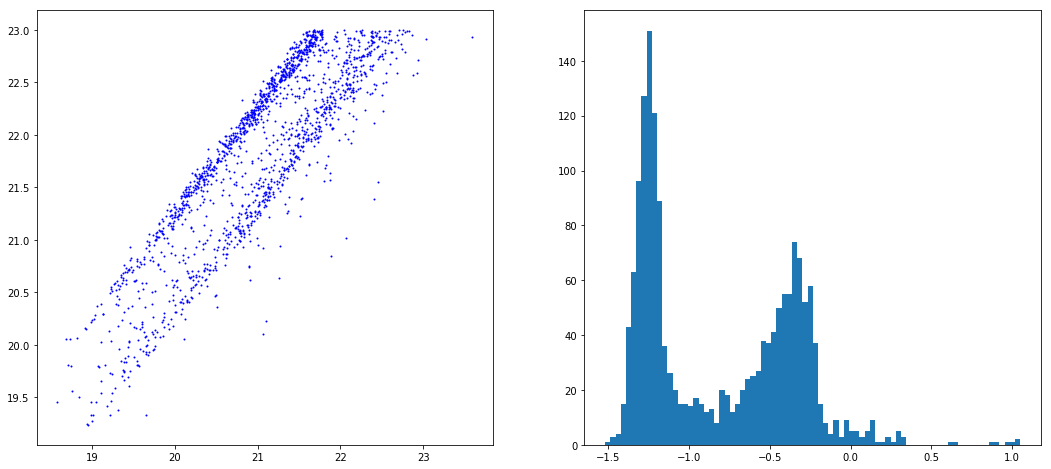

In [9]:
%matplotlib inline
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(18, 8))
_ = ax0.scatter(newCat['magROld'], newCat['magOld'], s=1, color='b')
_ = ax1.hist(newCat['magROld']-newCat['magOld'], bins=80)

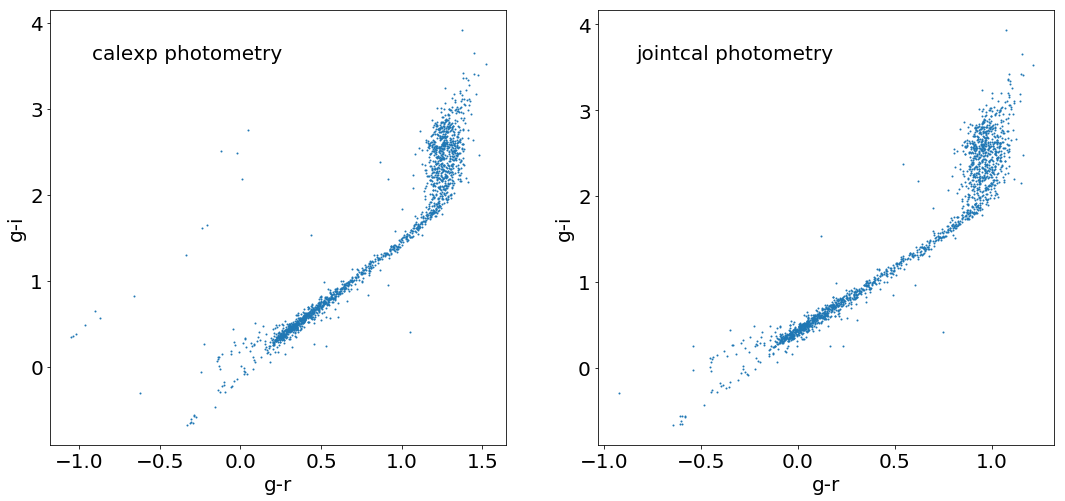

In [10]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(18, 8))
_ = ax0.scatter(newCat['magOld'] - newCat['magROld'], newCat['magOld'] - newCat['magIOld'], s=1)
ax0.set_xlabel('g-r', fontsize=20)
ax0.set_ylabel('g-i', fontsize=20)
ax0.text(0.3,0.9,'calexp photometry',horizontalalignment='center',
     verticalalignment='center', transform = ax0.transAxes, fontsize=20)
_ = ax1.scatter(newCat['magNew'] - newCat['magRNew'], newCat['magNew'] - newCat['magINew'], s=1)
ax1.set_xlabel('g-r', fontsize=20)
ax1.set_ylabel('g-i', fontsize=20)
ax1.text(0.3,0.9,'jointcal photometry',horizontalalignment='center',
     verticalalignment='center', transform = ax1.transAxes, fontsize=20)
ax0.tick_params(labelsize=20)
ax1.tick_params(labelsize=20)

fig.savefig('jointcal_color_simple.png')

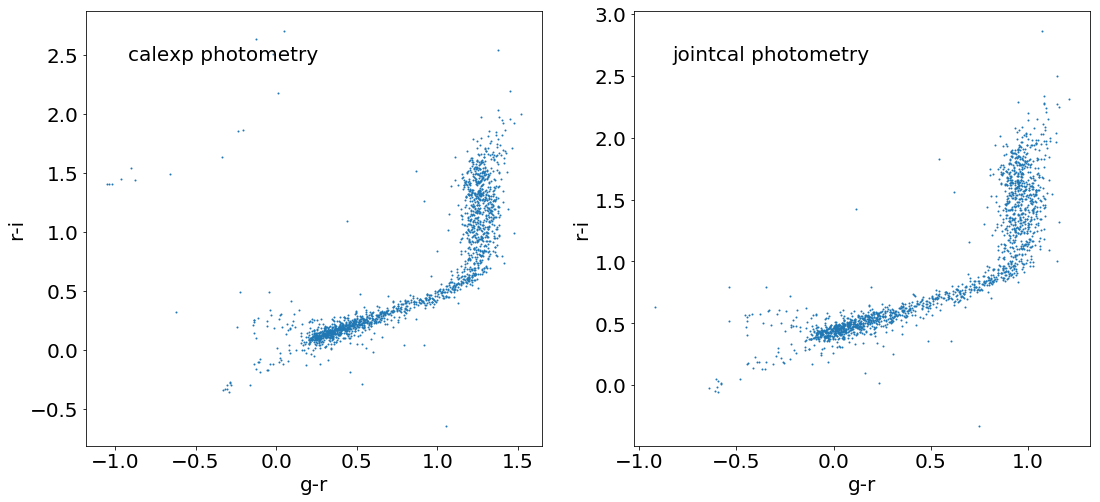

In [61]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(18, 8))
_ = ax0.scatter(newCat['magOld'] - newCat['magROld'], newCat['magROld'] - newCat['magIOld'], s=1)
ax0.set_xlabel('g-r', fontsize=20)
ax0.set_ylabel('r-i', fontsize=20)
ax0.text(0.3,0.9,'calexp photometry',horizontalalignment='center',
     verticalalignment='center', transform = ax0.transAxes, fontsize=20)
_ = ax1.scatter(newCat['magNew'] - newCat['magRNew'], newCat['magRNew'] - newCat['magINew'], s=1)
ax1.set_xlabel('g-r', fontsize=20)
ax1.set_ylabel('r-i', fontsize=20)
ax1.text(0.3,0.9,'jointcal photometry',horizontalalignment='center',
     verticalalignment='center', transform = ax1.transAxes, fontsize=20)
ax0.tick_params(labelsize=20)
ax1.tick_params(labelsize=20)

fig.savefig('jointcal_color_simple.png')

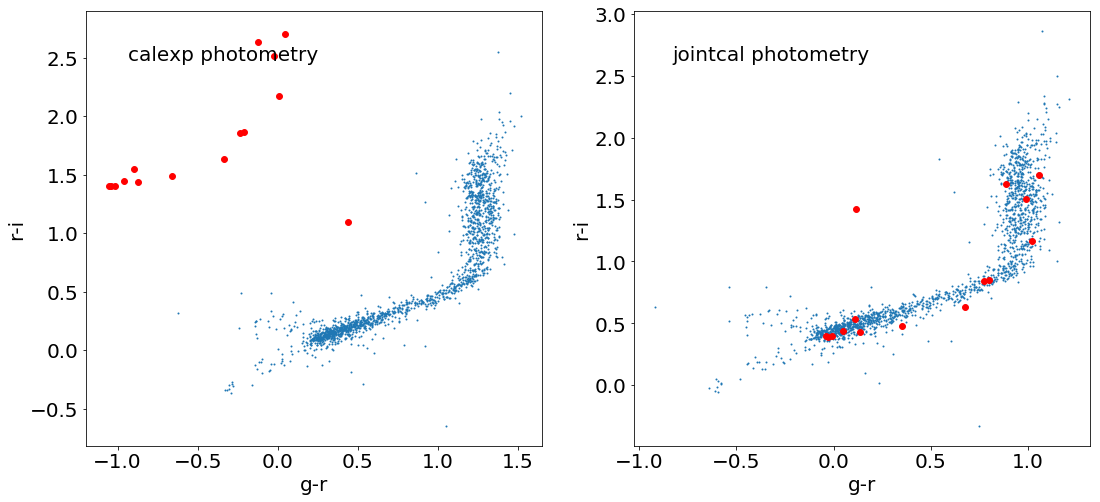

In [8]:
cc = (newCat['magOld'] - newCat['magROld'] < 0.5) & (newCat['magROld'] - newCat['magIOld'] > 1.0)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(18, 8))
_ = ax0.scatter(newCat['magOld'] - newCat['magROld'], newCat['magROld'] - newCat['magIOld'], s=1)
_ = ax0.scatter(newCat[cc]['magOld'] - newCat[cc]['magROld'], newCat[cc]['magROld'] - newCat[cc]['magIOld'], s=35, c='r')
ax0.set_xlabel('g-r', fontsize=20)
ax0.set_ylabel('r-i', fontsize=20)
ax0.text(0.3,0.9,'calexp photometry',horizontalalignment='center',
     verticalalignment='center', transform = ax0.transAxes, fontsize=20)
_ = ax1.scatter(newCat['magNew'] - newCat['magRNew'], newCat['magRNew'] - newCat['magINew'], s=1)
_ = ax1.scatter(newCat[cc]['magNew'] - newCat[cc]['magRNew'], newCat[cc]['magRNew'] - newCat[cc]['magINew'], s=35, c='r')
ax1.set_xlabel('g-r', fontsize=20)
ax1.set_ylabel('r-i', fontsize=20)
ax1.text(0.3,0.9,'jointcal photometry',horizontalalignment='center',
     verticalalignment='center', transform = ax1.transAxes, fontsize=20)
ax0.tick_params(labelsize=20)
ax1.tick_params(labelsize=20)

fig.savefig('jointcal_color_simple.png')

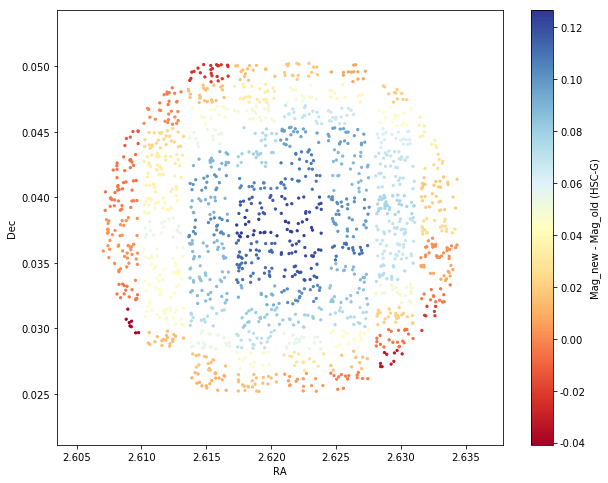

In [59]:
fig, (ax0) = plt.subplots(ncols=1, figsize=(10, 8))
sc = ax0.scatter(newCat['coord_ra'], newCat['coord_dec'], c = newCat['magNew'] - newCat['magOld'], s=5, cmap=plt.cm.RdYlBu)
cb = fig.colorbar(sc, format='%.2f')
cb.set_label('Mag_new - Mag_old (HSC-G)')
ax0.set_xlabel('RA')
ax0.set_ylabel('Dec')
fig.savefig('jointcal_color_ra_dec_g_simple.png')

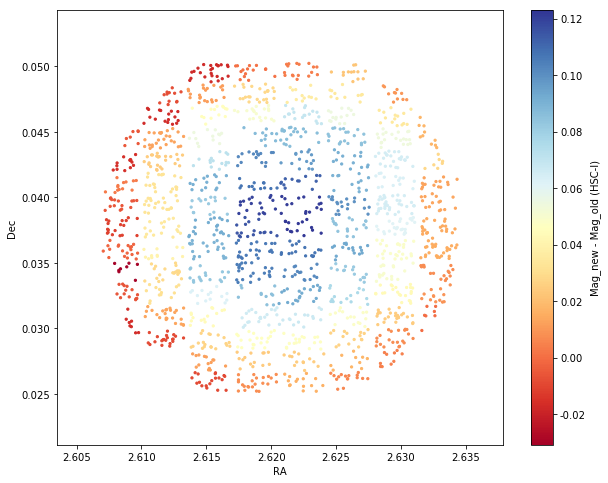

In [58]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
sc = ax1.scatter(newCat['coord_ra'], newCat['coord_dec'], c = newCat['magINew'] - newCat['magIOld'], s=5, cmap=plt.cm.RdYlBu)
cb = fig.colorbar(sc, format='%.2f')
cb.set_label('Mag_new - Mag_old (HSC-I)')
ax1.set_xlabel('RA')
ax1.set_ylabel('Dec')
fig.savefig('jointcal_color_ra_dec_i_simple.png')

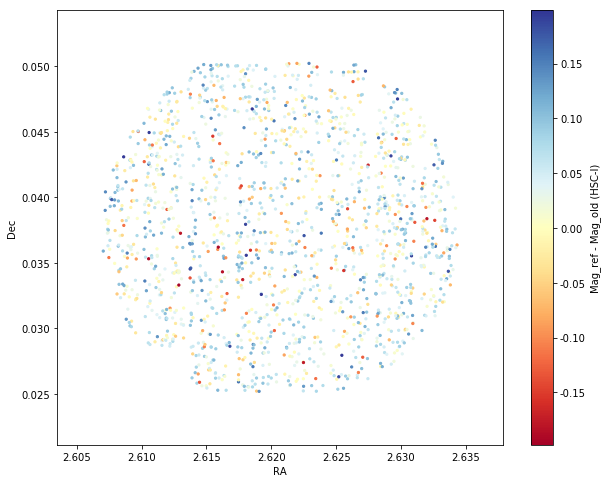

In [44]:
cc = (newCat['magIRef'] - newCat['magIOld'] < 0.2) & (newCat['magIRef'] - newCat['magIOld'] > -0.2)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
sc = ax1.scatter(newCat[cc]['coord_ra'], newCat[cc]['coord_dec'], c = newCat[cc]['magIRef'] - newCat[cc]['magIOld'], s=5, cmap=plt.cm.RdYlBu)
cb = fig.colorbar(sc, format='%.2f')
cb.set_label('Mag_ref - Mag_old (HSC-I)')
ax1.set_xlabel('RA')
ax1.set_ylabel('Dec')
#fig.savefig('jointcal_color_ra_dec_i_ref_simple.png')

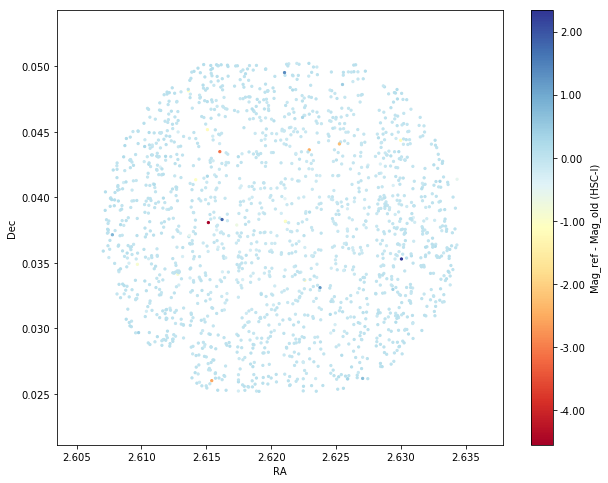

In [40]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
sc = ax1.scatter(newCat['coord_ra'], newCat['coord_dec'], c = newCat['magIRef'] - newCat['magINew'], s=5, cmap=plt.cm.RdYlBu)
cb = fig.colorbar(sc, format='%.2f')
cb.set_label('Mag_ref - Mag_old (HSC-I)')
ax1.set_xlabel('RA')
ax1.set_ylabel('Dec')
#fig.savefig('jointcal_color_ra_dec_i_ref_simple.png')

In [2]:
from lsst.pipe.tasks.makeSkyMap import MakeSkyMapTask
from lsst.pipe.tasks.selectImages import WcsSelectImagesTask, BaseExposureInfo


In [15]:
skyMap = butler.get("deepCoadd_skyMap")

In [19]:
for ccd in range(8):
    dataid = {'visit':visit, 'filter':filter, 'ccd':ccd, 'tract':tract}
    visitInfo = butler.get('calexp_visitInfo', dataId=dataid)
    md = butler.get('calexp_md', dataId=dataid)
    cal = butler.get('calexp', dataId=dataid)
    wcs = cal.getWcs()
    wcs.pixelToSky(0, 0)
    print(visitInfo.getBoresightRaDec(), md.get('RA'), md.get('DEC'), wcs.pixelToSky(0, 0))

IcrsCoord(150.1604500, 2.1641778) 10:00:38.508 +02:09:51.04 Fk5Coord(150.3710593, 1.4430575, 2000.00)
IcrsCoord(150.1604500, 2.1641778) 10:00:38.508 +02:09:51.04 Fk5Coord(150.1675822, 1.4408495, 2000.00)
IcrsCoord(150.1604500, 2.1641778) 10:00:38.508 +02:09:51.04 Fk5Coord(149.9640906, 1.4423591, 2000.00)
IcrsCoord(150.1604500, 2.1641778) 10:00:38.508 +02:09:51.04 Fk5Coord(149.7637172, 1.4478182, 2000.00)
IcrsCoord(150.1604500, 2.1641778) 10:00:38.508 +02:09:51.04 Fk5Coord(150.5743940, 1.5396472, 2000.00)
IcrsCoord(150.1604500, 2.1641778) 10:00:38.508 +02:09:51.04 Fk5Coord(150.3725754, 1.5344993, 2000.00)
IcrsCoord(150.1604500, 2.1641778) 10:00:38.508 +02:09:51.04 Fk5Coord(150.1675507, 1.5325606, 2000.00)
IcrsCoord(150.1604500, 2.1641778) 10:00:38.508 +02:09:51.04 Fk5Coord(149.9623977, 1.5338295, 2000.00)


In [18]:
wcs = cal.getWcs()
wcs.pixelToSky(0, 0)

Fk5Coord(150.37105932165446*afwGeom.degrees, 1.4430574663478646*afwGeom.degrees, 2000.0)

In [ ]:
visitInfo.